### Streamlining Your Research Laboratory with Python
* Authors:   Mark F. Russo, Ph.D and William Neil 
* Publisher: John Wiley & Sons, Inc.
* License:   MIT (https://opensource.org/licenses/MIT)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Compute the 4-parameters logistic function at Xs given the parameters
def fourPL(Xs, A, B, C, D):
    return [ D+(A-D)/(1 + math.pow((X/C),B) ) for X in Xs ]

In [2]:
# Fit all plate data to 4PLs
def fit_4PLs(df, Xs, guess, bounds):
    # For each row, copy data into a List, fit and accumulate fitted params
    param_sets = []
    for col in df.columns:
        # Fit the data to the 4PL
        params, _ = curve_fit(fourPL, Xs, df[col], p0=guess, bounds=bounds)
        param_sets.append( params )

    return param_sets


In [3]:
# Plot data in columns 1-10 in each row
def plot_fits(df, Xs, param_sets=None):

    # Dimensions of subplot layout
    nrows = 2
    ncols = 4

    # Create a panel of plots for measured data scatter plots
    fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6))

    # For all rows of wells, create scatter plot
    for r in range(nrows):                          # For all rows
        for c in range(ncols):                      # For all columns
            col = r*ncols+c                         # DataFrame column
            ax  = axs[r][c]                         # Ref to axis
            Ys  = df[col]                           # Measured data
            ax.scatter(Xs, Ys, marker='+')          # Create scatter plot
            ax.set_title(f'Sample {col}')           # Add title
    
    # Generate a list of log(conc) to be used for plotting all 4PL fits
    plot_concs = np.linspace(Xs[0], Xs[-1], 100)

    for r in range(nrows):                          # For all rows
        for c in range(ncols):                      # For all columns
            col = r*ncols+c                         # DataFrame column
            ax  = axs[r][c]                         # Ref to axis
            params = param_sets[col]                # Parameter set
            ax.plot(plot_concs, fourPL(plot_concs, *params))

    # Update and return figure
    fig.tight_layout()
    return fig


A=0.045 B=10.177 C=-4.930 D=1.000
A=0.070 B=11.418 C=-4.913 D=1.000
A=0.058 B=12.668 C=-5.022 D=1.000
A=0.053 B=12.611 C=-4.985 D=1.000
A=0.042 B=10.311 C=-4.981 D=1.000
A=0.058 B=11.981 C=-4.988 D=1.000
A=0.043 B=11.847 C=-5.022 D=1.000
A=0.061 B=12.444 C=-5.005 D=1.000


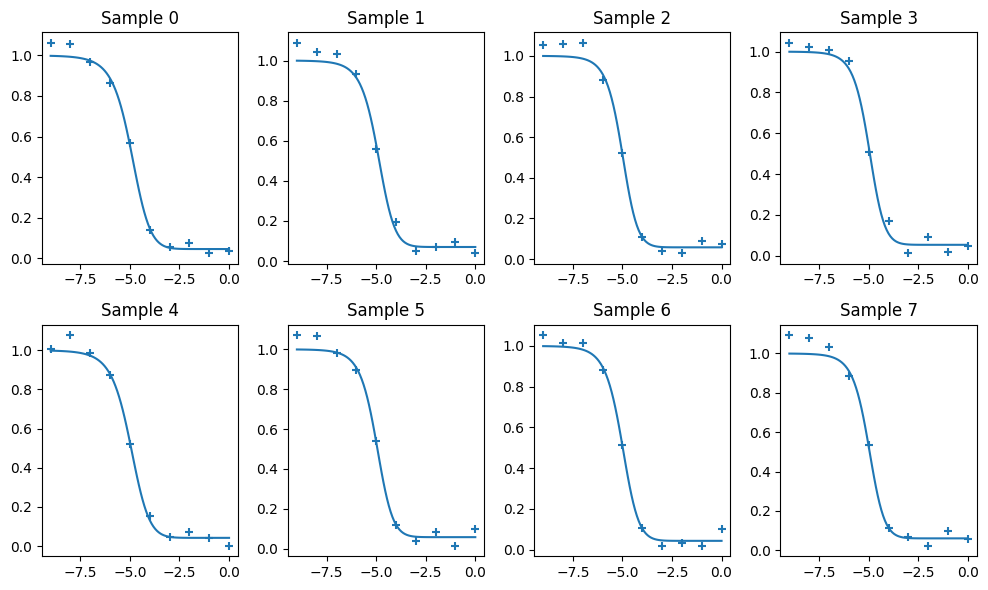

In [5]:
# Read data and transpose so columns hold data for single samples
df = pd.read_csv("data_plate.csv", header=None)
df = df.transpose()

# Fit all data
guess  = [0, 2, -5, 1]                            # Parameter guesses
bounds = [[0,0,-9,0], [1,1000,0,1]]               # Parameter bounds
concs  = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]  # log(concentrations)
param_sets = fit_4PLs(df, concs, guess, bounds)   # Fit all data

for ps in param_sets:                           # Print all parameters
    print(f'A={ps[0]:.3f} B={ps[1]:.3f} C={ps[2]:.3f} D={ps[3]:.3f}')

# Create a plot showing all data on eight axes.
fig1 = plot_fits(df, concs, param_sets=param_sets)
